## 매니폴드(Manifold) 시각화 해보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 스위스 롤(Swiss Roll)이란?
- 3차원 공간에서 2차원의 평면을 말아놓은 형태의 데이터 구조
- 롤케이크 모양처럼 2D 시트가 말려있는 구조
- 매니폴드 학습 알고리즘의 성능을 평가하는 대표적인 합성 데이터셋

### 지역 선형 임베딩(Locally Linear Embedding, LLE)

> LLE는 t-SNE, UMAP과 같은 다른 비선형 차원 축소 기법과 함께 고차원 데이터 분석에 유용한 도구입니다.

지역 선형 임베딩은 비선형 차원 축소 기법 중 하나로, 매니폴드 학습 알고리즘에 속합니다. 이 알고리즘은 데이터의 지역적 구조를 보존하면서 고차원 데이터를 저차원으로 매핑합니다.

#### 작동 원리

LLE는 다음과 같은 3단계 과정으로 작동한다.

1. **근접 이웃 찾기**: 각 데이터 포인트에 대해 k개의 가장 가까운 이웃을 찾는다.

2. **지역 재구성 가중치 계산**: 각 데이터 포인트를 그 이웃들의 선형 조합으로 표현한다. 즉, 각 포인트 Xi가 이웃들의 가중 합으로 가장 잘 재구성되는 가중치 Wij를 계산한다.

3. **저차원 임베딩 찾기**: 고차원 공간에서 계산한 가중치를 보존하는 저차원 공간의 표현을 찾는다.

#### 특징

- **비선형성**: 데이터의 비선형 구조를 효과적으로 포착한다.
- **지역적 구조 보존**: 각 데이터 포인트와 그 이웃 간의 관계를 보존한다.
- **비지도 학습**: 레이블 없이 데이터 구조만을 기반으로 한다.
- **매개변수 민감성**: 이웃 수(n_neighbors)에 민감하게 반응할 수 있다.

#### scikit-learn의 구현

```python
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)
```

- 주요 매개변수
    - `n_neighbors`: 각 점의 재구성에 사용할 이웃 수
    - `n_components`: 출력 차원 수
    - `method`: 구현 방식('standard', 'modified', 'hessian', 'ltsa' 중 하나)
    - `reg`: 정규화 매개변수

#### 장단점

##### 장점
- 비선형 관계를 잘 포착함
- 데이터의 지역적 특성을 잘 보존함
- 최적화 문제의 전역 최적해를 보장함

##### 단점
- 이웃 수 선택에 민감함
- 큰 데이터셋에서 계산 비용이 높음
- 매우 복잡한 매니폴드에서는 성능이 저하될 수 있음
- 새로운 데이터에 대한 추론(out-of-sample extension)이 내장되어 있지 않음

#### 활용 사례

- 이미지 데이터의 차원 축소
- 유전자 발현 데이터 분석
- 스위스 롤과 같은 인공 데이터에서 원래 매니폴드 구조 복원
- 복잡한 데이터셋의 시각화


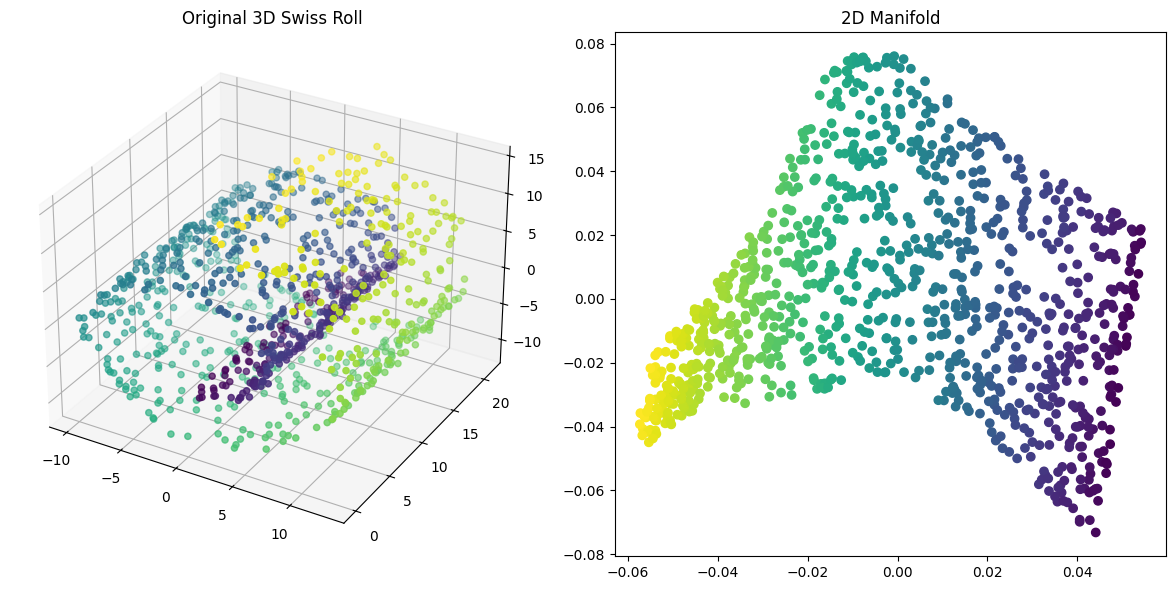

In [2]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


# 스위스 롤 데이터 생성 (3D)
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise=0.2, random_state=42)

# 매니폴드 학습을 통한 차원 축소 (2D)
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)

# 시각화
fig = plt.figure(figsize=(12, 6))

# 원본 3D 데이터
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap="viridis")
ax1.set_title("Original 3D Swiss Roll")

# 차원 축소된 2D 데이터
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap="viridis")
ax2.set_title("2D Manifold")

plt.tight_layout()
plt.show()
# 출력: 3D 스위스 롤과 2D로 펼쳐진 매니폴드 시각화

### 이미지 데이터에서 랜덤하게 샘플링한 데이터 시각화해보기

In [3]:
from sklearn.datasets import fetch_olivetti_faces


# Olivetti 얼굴 데이터셋 불러오기
faces_dataset = fetch_olivetti_faces()

In [4]:
faces_images = faces_dataset.images
faces_data = faces_dataset.data

# 데이터 형태 확인
print(f"이미지 형태: {faces_images.shape}")  # (400, 64, 64) - 400장의 64x64 이미지
print(f"데이터 형태: {faces_data.shape}")  # (400, 4096) - 400장의 이미지를 펼친 형태(64*64=4096)

이미지 형태: (400, 64, 64)
데이터 형태: (400, 4096)


In [5]:
total_image_num = faces_images.shape[0]
# 랜덤하게 얼굴 이미지 고르기
random_faces = faces_images[np.random.choice(total_image_num, size=6)]
random_faces.shape

(6, 64, 64)

In [6]:
def show_gray_image_array(flattened_axes, images: np.ndarray, title: str = ""):
    for idx, ax in enumerate(flattened_axes):
        ax.imshow(images[idx], cmap="gray")
        ax.axis("off")
        if not title:
            continue
        ax.set_title(f"{title} {idx + 1}")

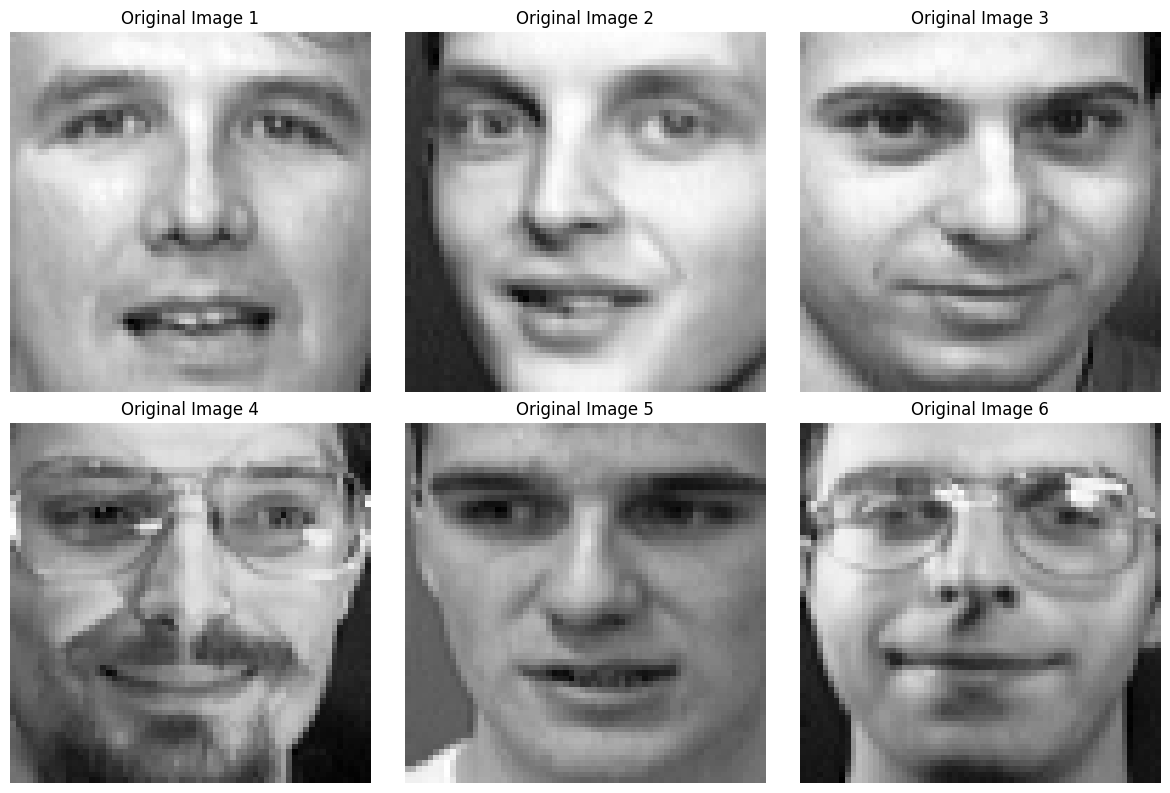

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

show_gray_image_array(axes.flatten(), images=random_faces, title="Original Image")

plt.tight_layout()
plt.show()

무작위로 픽셀 값을 선택하여 32x32 이미지 생성

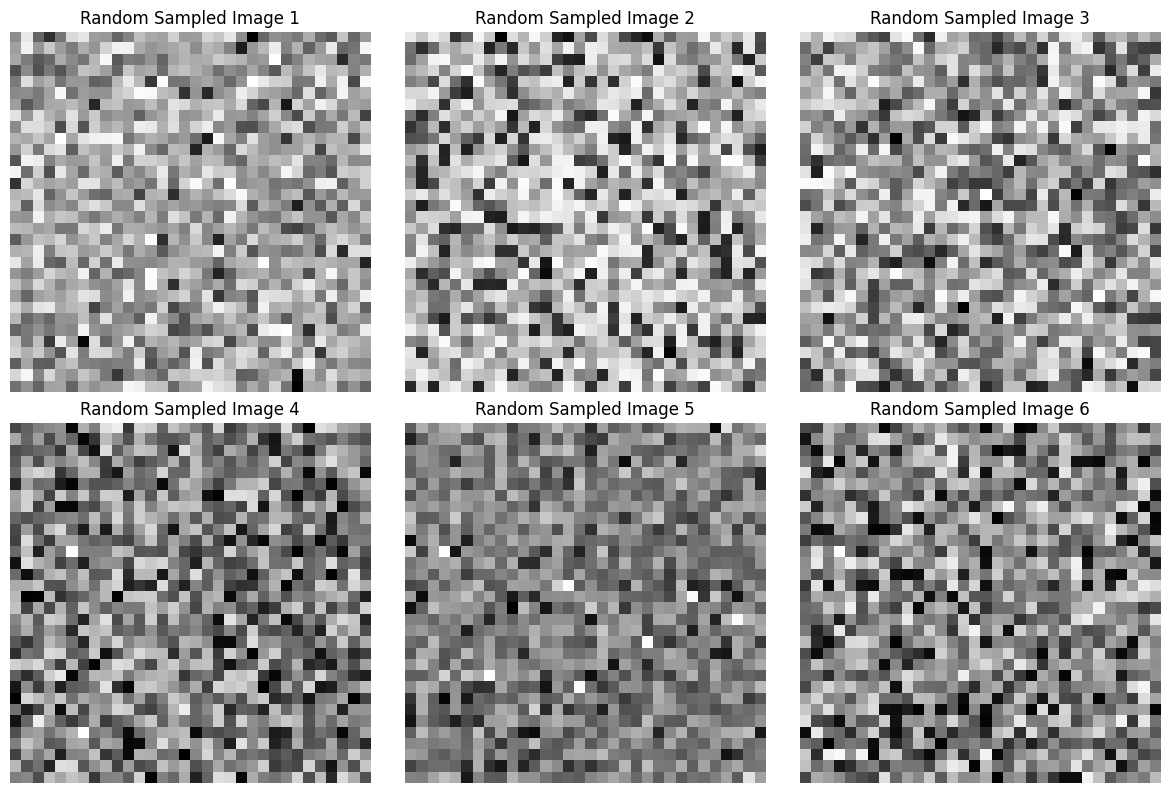

In [8]:
n_samples = len(random_faces)  # 랜덤 샘플링할 이미지 수
random_sampled_images = np.zeros((n_samples, 32, 32))

for i in range(n_samples):
    # 이미지에서 무작위로 32 x 32(1024)개의 픽셀 값 선택
    random_face_image = random_faces[i]
    all_pixel_values = random_face_image.flatten()

    random_indices = np.random.randint(0, len(all_pixel_values), size=32 * 32)
    random_pixels = all_pixel_values[random_indices]

    # 32 x 32 이미지 형태로 재구성
    random_sampled_images[i] = random_pixels.reshape(32, 32)

# 무작위로 생성된 이미지 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

show_gray_image_array(axes.flatten(), images=random_sampled_images, title="Random Sampled Image")

plt.tight_layout()
plt.show()

## PCA 와 SVD 의 관계

In [9]:
import numpy as np
from sklearn.datasets import load_iris

In [10]:
# 데이터 로드
iris = load_iris()
X = iris.data
print("데이터의 shape:", X.shape)
X_centered = X - np.mean(X, axis=0)  # 데이터 중심화

데이터의 shape: (150, 4)


In [11]:
# 방법 1: PCA (고유값 분해 사용)
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# 내림차순 정렬
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

eigenvalues.shape, eigenvectors.shape

((4,), (4, 4))

In [12]:
# 방법 2: SVD
U, singular_values, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [13]:
# 관계 확인: 고유값 = 특이값의 제곱
print("PCA 고유값:")
print(eigenvalues)
print()

print("SVD 특이값의 제곱:")
print(singular_values**2 / (X_centered.shape[0] - 1))  # 샘플 수 보정

PCA 고유값:
[4.22824171 0.24267075 0.0782095  0.02383509]

SVD 특이값의 제곱:
[4.22824171 0.24267075 0.0782095  0.02383509]


In [14]:
# 주성분 방향 비교: PCA 고유벡터 vs SVD 오른쪽 특이벡터
print("PCA 첫 번째 주성분(고유벡터):")
print(eigenvectors[:, 0])
print()
print("SVD 첫 번째 오른쪽 특이벡터:")
print(Vt[0])  # 부호가 반대일 수 있음

PCA 첫 번째 주성분(고유벡터):
[-0.36138659  0.08452251 -0.85667061 -0.3582892 ]

SVD 첫 번째 오른쪽 특이벡터:
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


위 고유벡터 `[-0.36138659, 0.08452251, -0.85667061, -0.3582892]`는 다음과 같이 해석할 수 있다.

1. **고유벡터의 원소 의미**: 이 값들은 원래 특성(feature)들이 첫 번째 주성분에 어떻게 기여하는지를 나타낸다. 아이리스 데이터셋에는 4개의 특성이 있다.
    - 꽃받침 길이(sepal length)
    - 꽃받침 너비(sepal width)
    - 꽃잎 길이(petal length)
    - 꽃잎 너비(petal width)

2. **각 특성의 기여도**
    - 꽃받침 길이: -0.36138659
    - 꽃받침 너비: 0.08452251
    - 꽃잎 길이: -0.85667061
    - 꽃잎 너비: -0.3582892

3. **해석**
    - 절대값이 클수록 해당 특성이 주성분에 더 큰 영향을 미친다.
    - 따라서 꽃잎 길이(-0.85667061)가 첫 번째 주성분에 가장 큰 영향을 미치고 있다.
    - 꽃받침 너비(0.08452251)는 상대적으로 영향이 적다.

4. **부호의 의미**
    - 같은 부호를 가진 특성들은 같은 방향으로 움직이는 경향이 있다.
    - 반대 부호를 가진 특성들은 반대 방향으로 움직이는 경향이 있다.
    - 여기서는 꽃받침 너비만 양수이고 나머지는 모두 음수다. 이는 꽃받침 너비가 다른 특성들과 반대 방향으로 변화한다는 것을 의미한다.

5. **주성분의 방향**
    - 이 벡터는 데이터의 분산이 가장 큰 방향을 나타낸다.
    - 첫 번째 주성분은 데이터의 변동성을 가장 많이 설명하는 축이다.

아이리스 데이터셋에서 이 주성분은 주로 꽃잎 길이의 변화를 설명하며, 꽃받침 길이와 꽃잎 너비도 어느 정도 영향을 미치고 있다.

## PCA 와 t-SNE 비교해보기

- mnist 데이터셋을 2차원 축소 뒤 시각화를 했을 때, 두 알고리즘이 어떻게 차이가 나는지 보자.
- mnist 데이터셋은 0 ~ 9 까지의 숫자에 대한 흑백 손글씨 이미지로 크기가 28x28 이다.

In [15]:
import time

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
# MNIST 데이터셋 일부 로드
mnist = fetch_openml("mnist_784", version=1, parser="auto")
X = mnist.data[:3000] / 255.0  # 정규화
y = mnist.target[:3000].astype(int)

random_state = 1234

X.shape, y.shape

((3000, 784), (3000,))

In [17]:
# PCA 적용
t0 = time.time()
pca = PCA(n_components=2, random_state=random_state)  # 2차원으로 축소
X_pca = pca.fit_transform(X)
t_pca = time.time() - t0
print(f"PCA 실행 시간: {t_pca:.2f}초")

PCA 실행 시간: 0.02초


In [18]:
# t-SNE 적용
t0 = time.time()
tsne = TSNE(n_components=2, random_state=random_state)  # 2차원으로 축소
X_tsne = tsne.fit_transform(X)
t_tsne = time.time() - t0
print(f"t-SNE 실행 시간: {t_tsne:.2f}초")

t-SNE 실행 시간: 3.96초


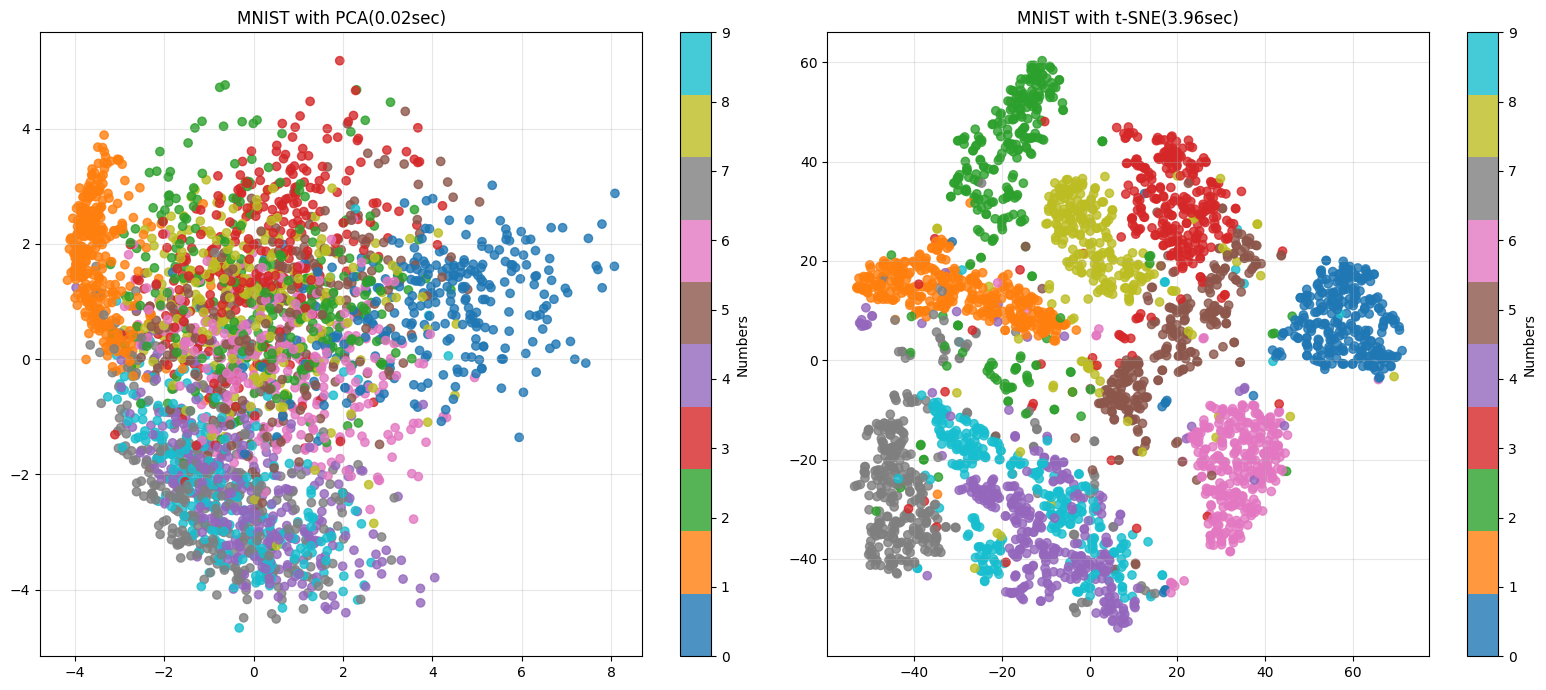

In [19]:
# 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PCA 결과
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.8)
ax1.set_title(f"MNIST with PCA({t_pca:.2f}sec)")
ax1.grid(alpha=0.3)
fig.colorbar(scatter1, ax=ax1, label="Numbers")

# t-SNE 결과
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.8)
ax2.set_title(f"MNIST with t-SNE({t_tsne:.2f}sec)")
ax2.grid(alpha=0.3)
fig.colorbar(scatter2, ax=ax2, label="Numbers")

plt.tight_layout()
plt.show()

- 두 기법의 시각적 결과 비교
    - PCA는 선형 기법으로 계산이 빠르지만, 비선형 관계를 잘 포착하지 못할 수 있다.
    - t-SNE는 비선형 기법으로 계산이 느리지만, 복잡한 구조를 더 잘 보존할 수 있다.
    - MNIST 데이터에서 t-SNE는 일반적으로 같은 숫자끼리 더 잘 군집화하는 경향이 있다.

일반적으로 t-SNE는 PCA보다 계산 비용이 크지만, 고차원 데이터의 군집 구조를 더 잘 보존하는 경향이 있다.

## 군집화(Clustering)

- 다양한 군집화 알고리즘의 시각화

In [20]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.mixture import GaussianMixture

In [21]:
# 데이터셋 생성
n_samples = 1000
random_state = 4321

# 두 개의 반달 모양 클러스터
X_moons, _ = make_moons(n_samples=n_samples, noise=0.08, random_state=random_state)

# 밀도가 다른 세 개의 클러스터
X_varied, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

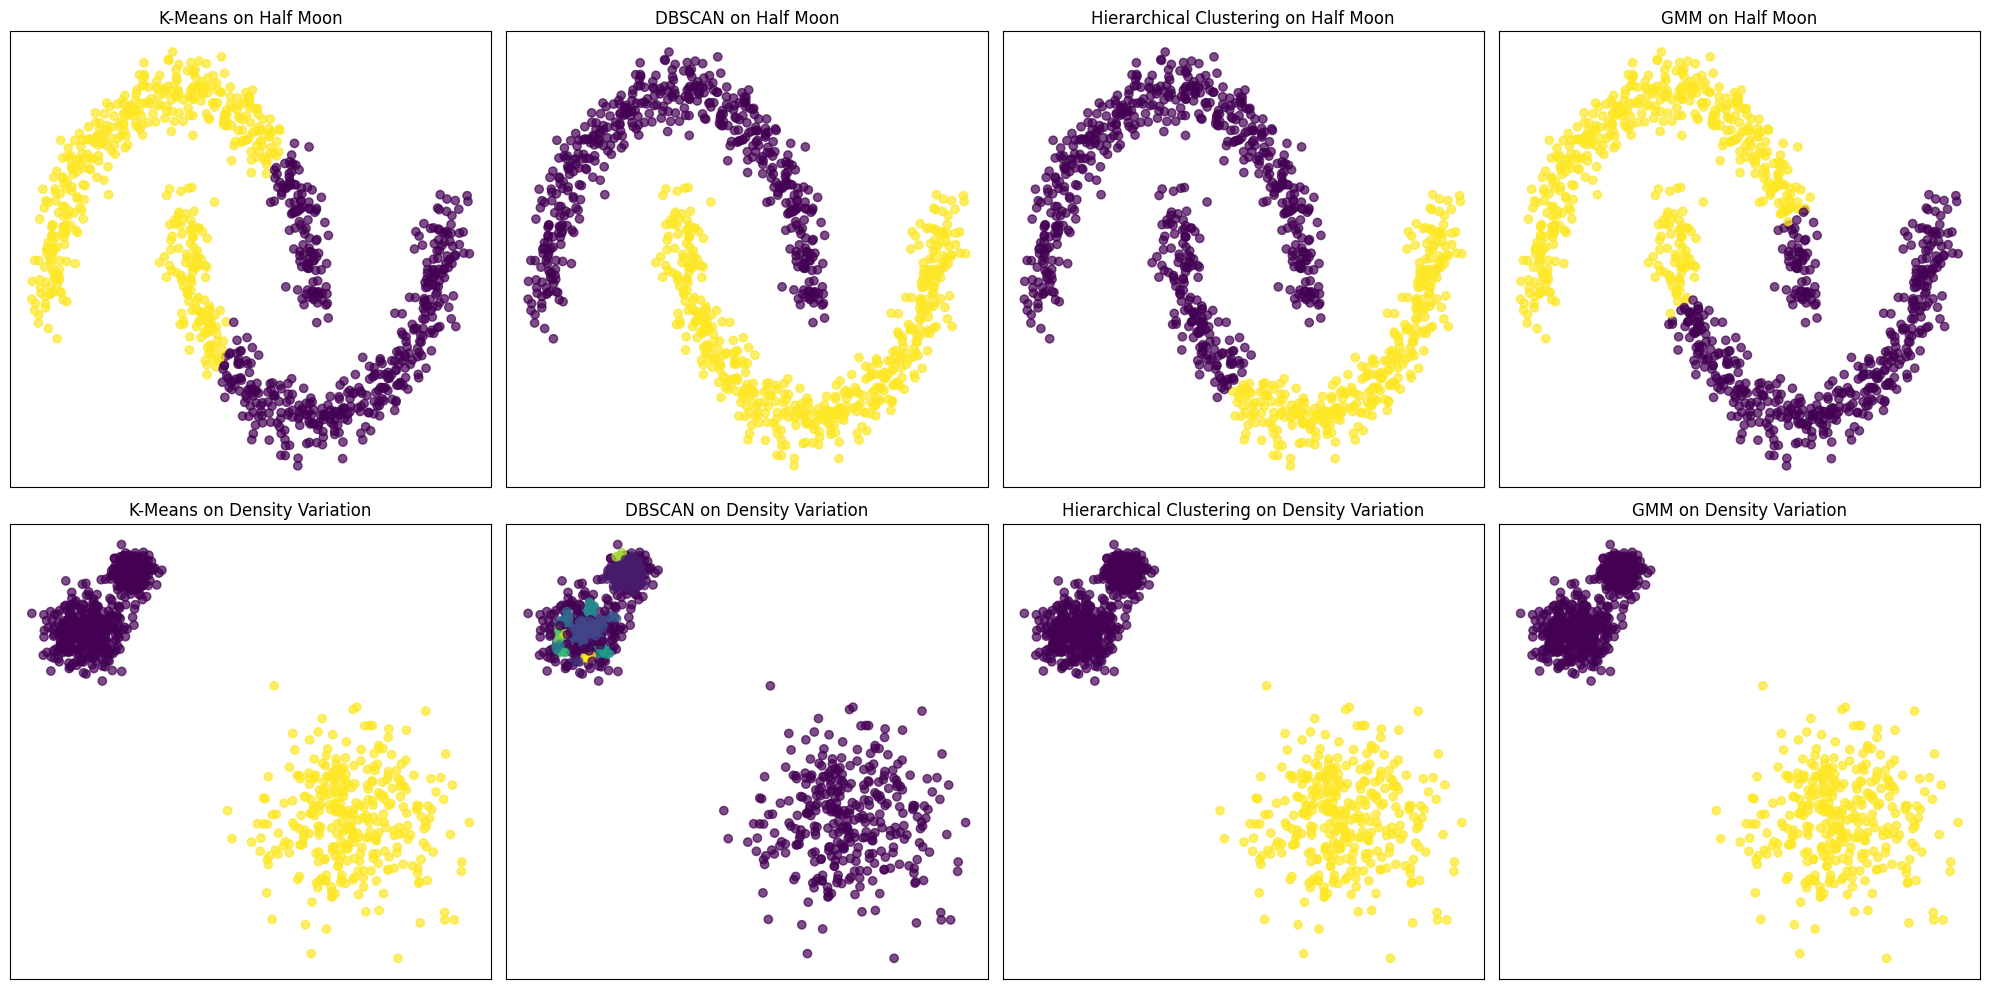

In [22]:
# 알고리즘 설정
algorithms = {
    "K-Means": KMeans(n_clusters=2, random_state=random_state),
    "DBSCAN": DBSCAN(eps=0.2),
    "Hierarchical Clustering": AgglomerativeClustering(n_clusters=2),
    "GMM": GaussianMixture(n_components=2, random_state=random_state),
}

# 결과 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (X, dataset_name) in enumerate(zip([X_moons, X_varied], ["Half Moon", "Density Variation"], strict=False)):
    for j, (name, algorithm) in enumerate(algorithms.items()):
        ax = axes[i, j]

        # 알고리즘 적용
        clusters = algorithm.fit_predict(X)

        # 시각화
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", alpha=0.7)
        ax.set_title(f"{name} on {dataset_name}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()